# Logistic regression model

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE


In [31]:
df = pd.read_csv(r'data\BankChurners_preprocessed.csv')

In [32]:
df.head(), df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Income_Category           10127 non-null  int64  
 6   Card_Category             10127 non-null  int64  
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

(   Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
 0               1            45       1                3                2   
 1               1            49       0                5                4   
 2               1            51       1                3                4   
 3               1            40       0                4                2   
 4               1            40       1                3                1   
 
    Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
 0                3              0              39                         5   
 1                1              0              44                         6   
 2                4              0              36                         4   
 3                1              0              34                         3   
 4                3              0              21                         5   
 
    Months_Inactive_12_mon  ...  Total_Revolving

In [33]:
# Define the feature matrix X and the target vector y
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test= train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:

# Initialize and fit the logistic regression model
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
classification_rep = classification_report(y_test, y_pred)

# Calculate FPR, TPR, and Thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print("")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)
print("\nROC AUC:\n", roc_auc)



Accuracy: 0.8461764705882353

Confusion Matrix:
 Predicted     0     1   All
Actual                     
0          1421   303  1724
1           220  1456  1676
All        1641  1759  3400

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1724
           1       0.83      0.87      0.85      1676

    accuracy                           0.85      3400
   macro avg       0.85      0.85      0.85      3400
weighted avg       0.85      0.85      0.85      3400


ROC AUC:
 0.9267604892878304


c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Before SMOTE
#### Logistic regression
- Accuracy: 88%
- ROC AUC: 89% (This metric shows the capability of the model to distinguish between the classes).

#### Confusion Matrix
This table shows that out of the customers who did not churn (Actual 0), 149 were correctly classified as not churning, but 178 were incorrectly classified as churning. For the customers who did churn (Actual 1), 1650 were correctly identified, with 49 incorrectly labeled as not churning.

#### Classification report
Precision for class 0 (non-churners) is 0.75, which is decent, indicating that when the model predicts a customer won't churn, it's correct about 75% of the time.
Recall for class 0 is 0.46, suggesting the model struggles with identifying all true non-churn cases.
For class 1 (churners), precision is high at 0.90, and recall is also very high at 0.97, indicating the model is highly effective at identifying churners.

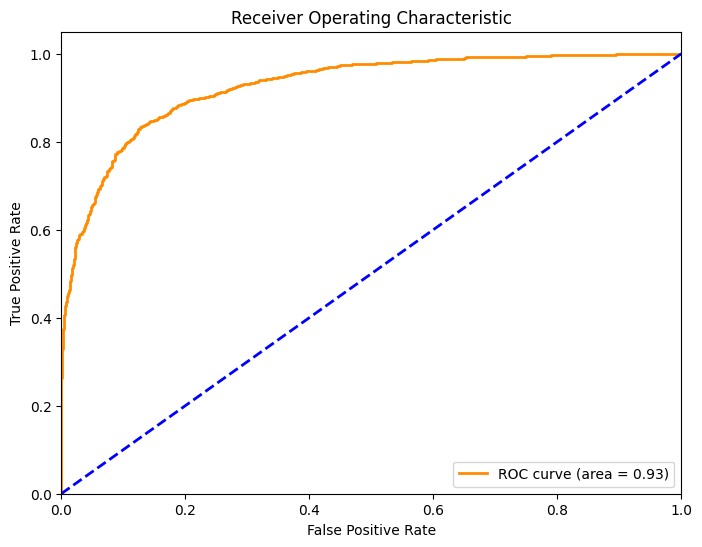

In [35]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Nasrin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Scores: [0.73593287 0.87709773 0.90419753 0.91654321 0.85333333]
Mean CV Score: 0.8574209352491682
Standard Deviation in CV Scores: 0.06457046899205214


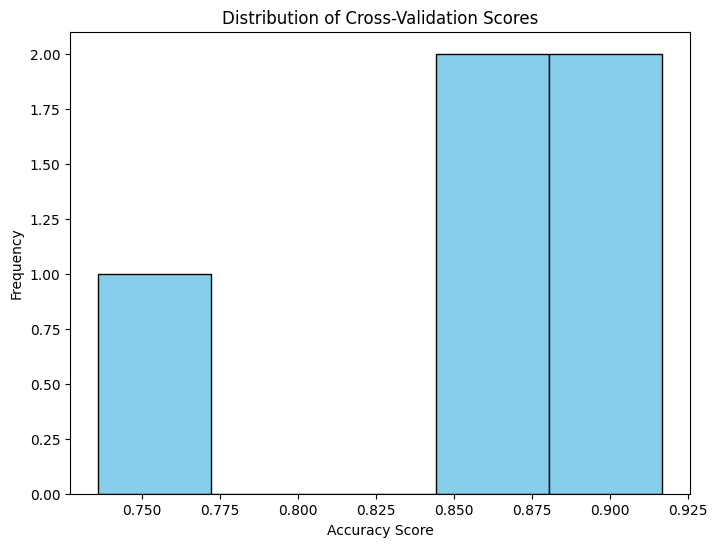

In [36]:
# Perform enhanced cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logistic_regression, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Calculate mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print detailed cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation in CV Scores:", std_cv_score)

# Plotting the distribution of cross-validation scores
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Cross-Validation Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.show()
